Project root added to sys.path: d:\Handwritten Digit Recognition

 Test Accuracy: 0.9121
⏱ Training time: 7.27 sec
⏱ Prediction time: 0.00 sec

 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.91      1032
           3       0.90      0.90      0.90      1010
           4       0.91      0.92      0.91       982
           5       0.88      0.84      0.86       892
           6       0.92      0.96      0.94       958
           7       0.92      0.92      0.92      1028
           8       0.88      0.85      0.86       974
           9       0.88      0.87      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



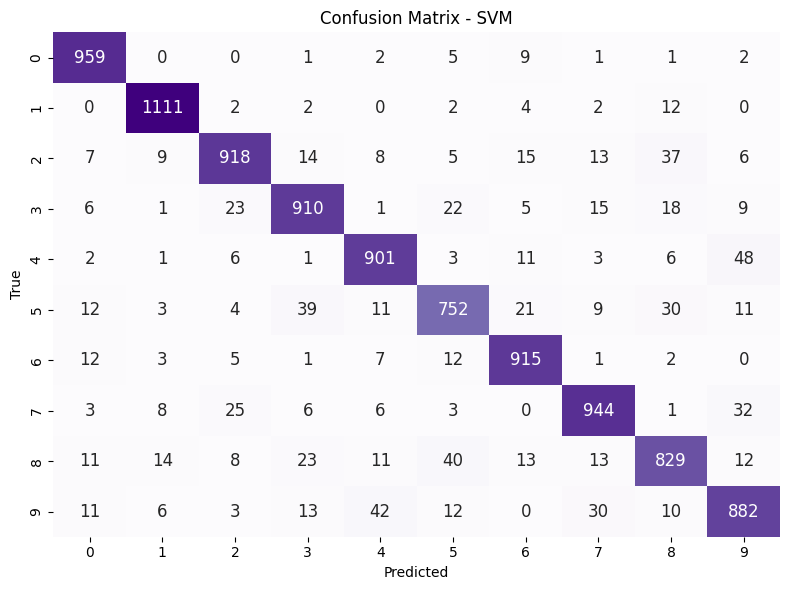

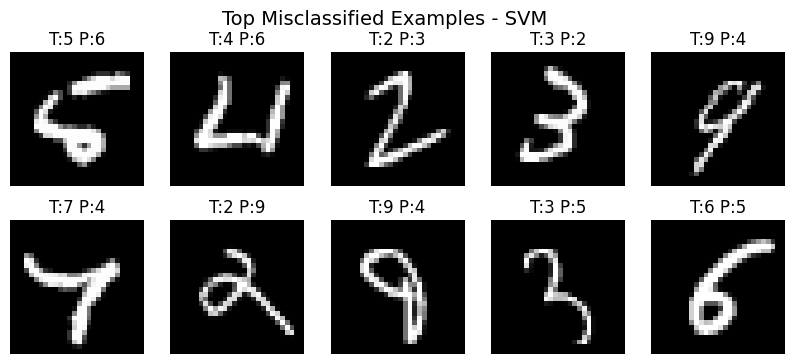

In [ ]:
%run ../utils/init_notebook.py

from utils.data_loader import load_mnist
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
X_train, y_train, X_test, y_test = load_mnist(normalise=True)

# Flatten images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Take a subset
subset_size = 30000
X_train_sub = X_train_flat[:subset_size]
y_train_sub = y_train[:subset_size]

#Use PCA and reduce dimensionality
pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train_sub)
X_test_pca = pca.transform(X_test_flat)

# Train SVM
svm_model = LinearSVC(random_state=42, max_iter=1000)
start_train = time.time()
svm_model.fit(X_train_pca, y_train_sub)
end_train = time.time()

# Predict
start_pred = time.time()
y_pred_svm = svm_model.predict(X_test_pca)
end_pred = time.time()

# Accuracy
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"\n Test Accuracy: {acc_svm:.4f}")
print(f"⏱ Training time: {end_train - start_train:.2f} sec")
print(f"⏱ Prediction time: {end_pred - start_pred:.2f} sec")

# Classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Purples", cbar=False, annot_kws={"size": 12})
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - SVM")
plt.tight_layout()
plt.show()

# Show misclassified examples
misclassified_idx_svm = np.where(y_pred_svm != y_test)[0]
plt.figure(figsize=(10, 4))
for i, idx in enumerate(misclassified_idx_svm[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"T:{y_test[idx]} P:{y_pred_svm[idx]}")
    plt.axis('off')
plt.suptitle("Top Misclassified Examples - SVM", fontsize=14)
plt.show()
